<h1>I. Importação de bibliotecas  </h1>
Primeiro importando e preparando os dados.

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [94]:
dfu = pd.read_excel('censobrUFs.xlsx')
dfu.head()

,UF,Código,Gentílico [-],Governador [2019],Capital,Area,População,Densidade,Matrículas no ensino fundamental,IDH[2010],Receitas[2017],Despesas[2017],Rendimento mensal domiciliar per capita,Total de veículos
0,Acre,12.0,acriano,GLADSON DE LIMA CAMELI,Rio Branco,164173.431,906876.0,4.47,156679.0,0.663,6.632883e+06,6.084417e+06,917.0,306258.0
1,Alagoas,27.0,alagoano,JOSE RENAN VASCONCELOS CALHEIROS FILHO,Maceió,27830.656,3365351.0,112.33,464704.0,0.631,1.195044e+07,1.046063e+07,796.0,930933.0
2,Amapá,16.0,amapaense,ANTONIO WALDEZ GÓES DA SILVA,Macapá,142470.762,877613.0,4.69,134820.0,0.708,5.396417e+06,4.224464e+06,893.0,215330.0
3,Amazonas,13.0,amazonense,WILSON MIRANDA LIMA,Manaus,1559167.878,4269995.0,2.23,700104.0,0.674,1.732846e+07,1.532490e+07,852.0,969722.0
4,Bahia,29.0,baiano,RUI COSTA DOS SANTOS,Salvador,564760.427,14985284.0,24.82,1947177.0,0.660,5.019100e+07,4.557016e+07,965.0,4506825.0


In [95]:
df = pd.read_excel('indicadoressegurancapublicauf.xlsx')
df.head()

,UF,Tipo Crime,Ano,Mês,Ocorrências
0,Acre,Estupro,2021,janeiro,39
1,Acre,Furto de veículo,2021,janeiro,55
2,Acre,Homicídio doloso,2021,janeiro,14
3,Acre,Lesão corporal seguida de morte,2021,janeiro,0
4,Acre,Roubo a instituição financeira,2021,janeiro,0


Existem um total de 1.853.200 de ocorrências desde 2015.

In [96]:
statistics = df['Ocorrências'].describe().reset_index()

statistics.style.format({"number": "{:20,.0f}"}).hide_index().highlight_max(color='#FFB27A')

index,Ocorrências
count,18532.000000
mean,212.181092
std,693.801155
min,0.000000
25%,3.000000
50%,34.000000
75%,173.000000
max,10518.000000


In [97]:
#Vamos agrupar os estados e o total de ocorrências em cada um deles em uma única tabela
crime_UF = df.groupby(by = 'UF')['Ocorrências'].sum().reset_index()
crime_UF.head()

,UF,Ocorrências
0,Acre,10591
1,Alagoas,42767
2,Amapá,11595
3,Amazonas,48791
4,Bahia,188834


In [98]:
#Vamos agrupar os tipos de crime e o total de ocorrências em cada um deles em uma única tabela
crime_tipo = df.groupby(by = 'Tipo Crime')['Ocorrências'].sum().sort_values(ascending = False).reset_index()
crime_tipo.head()

,Tipo Crime,Ocorrências
0,Furto de veículo,1516590
1,Roubo de veículo,1412246
2,Estupro,316513
3,Homicídio doloso,296113
4,Tentativa de homicídio,240683


In [99]:
#Agora junto a tabela de estados vamos uni-la com dados do censo IBGE
crime_UF['População'] = dfu['População']
crime_UF['Area'] = dfu['Area']
crime_UF['Densidade'] = dfu['Densidade']
crime_UF['Veiculos'] = dfu['Total de veículos']
crime_UF['Receita'] = dfu['Receitas[2017]']
crime_UF['Proporção'] = crime_UF['Ocorrências']/dfu['População']
crime_UF = crime_UF.sort_values('Ocorrências',ascending=False)
crime_UF.head()

,UF,Ocorrências,População,Area,Densidade,Veiculos,Receita,Proporção
25,São Paulo,1149075,46649132.0,248219.481,166.23,30778960.0,2.328225e+08,0.024632
20,Rio de Janeiro,486208,17463349.0,43750.426,365.23,7087797.0,7.848814e+07,0.027842
12,Minas Gerais,265267,21411923.0,586513.993,33.41,12053218.0,9.719982e+07,0.012389
19,Rio Grande do Sul,256339,11466630.0,281707.149,37.96,7495615.0,6.639747e+07,0.022355
13,Paraná,214313,11597484.0,199298.982,52.40,8077413.0,6.016358e+07,0.018479


<h1>I. Visualização e Análise  </h1>
Agora vamos começar construindo alguns gráficos.

Como esperado o estado com maior criminalidade durante os últimos 7 anos foi São Paulo. Cehgando a ser **mais do dobro** em relação ao Rio de Janeiro que está em segundo estado com maior criminalidade.

Text(0.5, 0, 'Estados do Brasil')

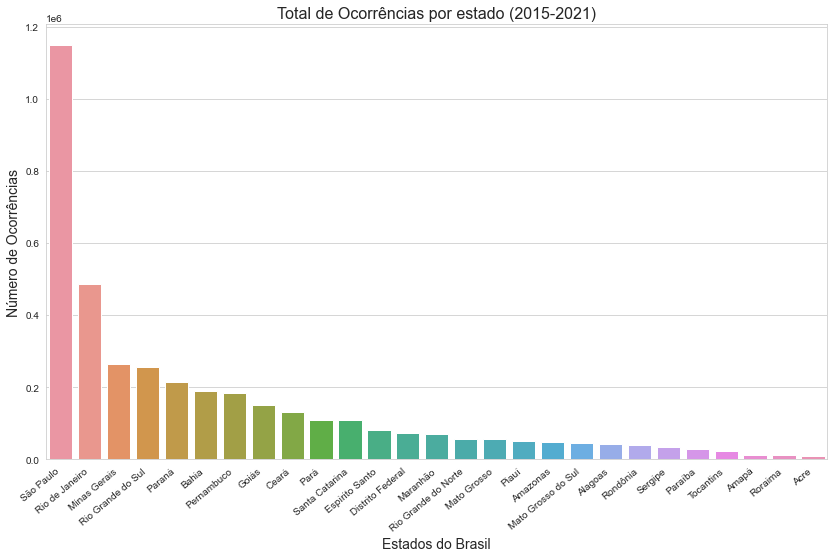

In [100]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=crime_UF,x='UF',y='Ocorrências')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total de Ocorrências por estado (2015-2021)',fontsize=16)
ax.set_ylabel('Número de Ocorrências',fontsize=14)
ax.set_xlabel('Estados do Brasil',fontsize=14)

Realizando uma proporção entre a quantidade de ocorrências e a população em cada estado obtemos um ranking tanto quanto diferente do anterior. Não é uma surpresa Rio de Janeiro em primeiro or São Paulo em segundo, o mais surpreendente é Brasília, Distrito Federal em terceiro, visto que olhando somente para o total de ocorrências, ele era o **14°, agora passando a ser o 3°** estado com maior criminalidade em relação a sua proporção de habitantes. 

Text(0.5, 0, 'Estados do Brasil')

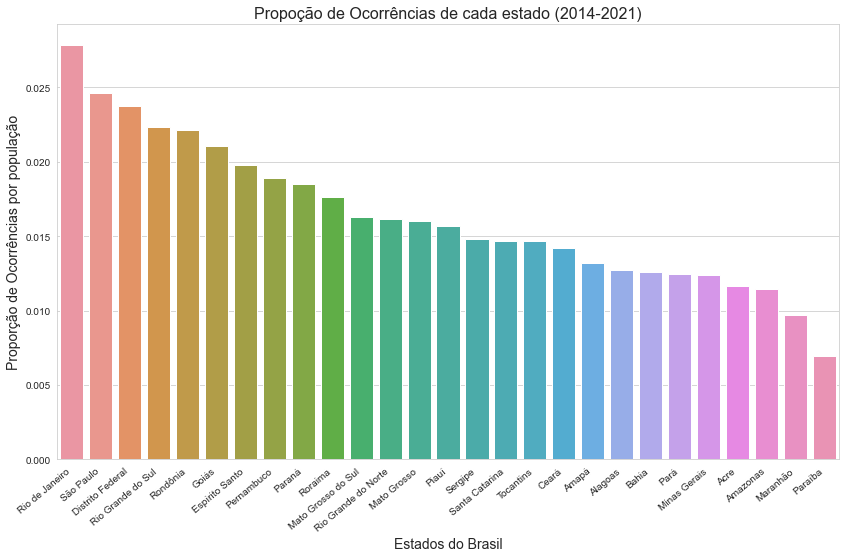

In [101]:
proporção_UF = data=crime_UF.sort_values('Proporção',ascending=False)

plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=proporção_UF,x='UF',y='Proporção')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Propoção de Ocorrências de cada estado (2014-2021)',fontsize=16)
ax.set_ylabel('Proporção de Ocorrências por população',fontsize=14)
ax.set_xlabel('Estados do Brasil',fontsize=14)

Outra estatistica que pode surpreender a muitos é a quantidade de crimes relacionado a veículos, sendo eles Furto de veículo e Roubo de Veículo. Mesmo todos os outros crimes somados, ainda não se chega próximo a quantidade de crimes de furto e roubo de veiculos.

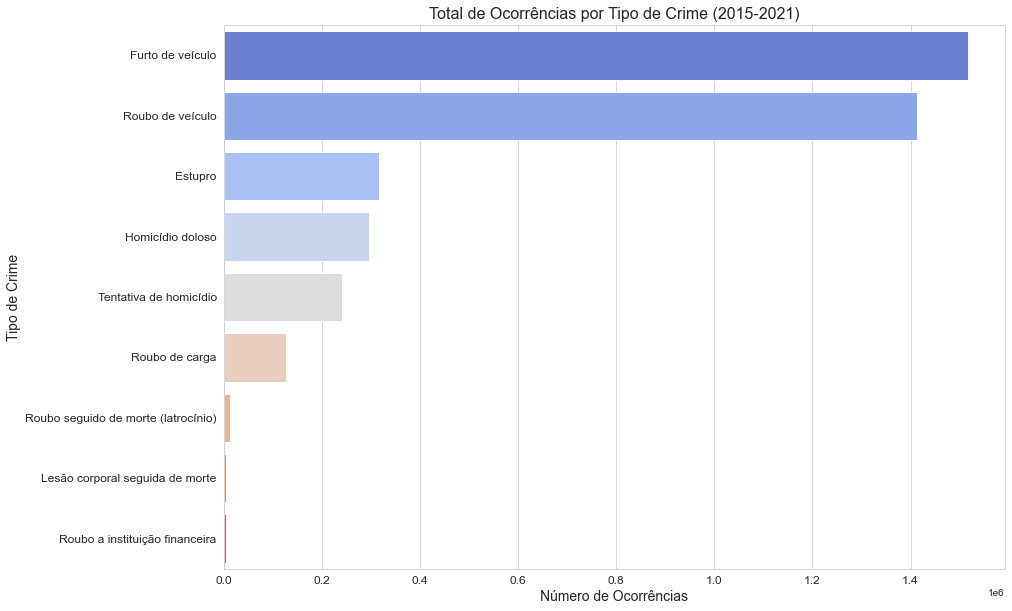

In [108]:
# Plot Figure
plt.figure(figsize=(14,10)) # this creates a figure 14 inch wide, 10 inch high
ax = sns.barplot(data=crime_tipo,y='Tipo Crime',x='Ocorrências',palette='coolwarm')
ax.set_title('Total de Ocorrências por Tipo de Crime (2015-2021)',fontsize=16)
ax.set_ylabel('Tipo de Crime',fontsize=14)
ax.set_xlabel('Número de Ocorrências',fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

Observando o total de ocorrências por ano, se vê uma redução anual, iniciada em 2018. Razão desta redução é devido ao **Plano Nacional de Segurança Pública (PNSP)** que teve como concepção inicial em  22 de novembro de 2017, em prol do combate a criminalidade no Brasil. As ocorrências de 2021 são datadas até o mês de maio.

In [103]:
crime_Ano = df.groupby(by = 'Ano')['Ocorrências'].sum().reset_index()#.sort_values(ascending = False)

Text(0.5, 0, 'Linha do tempo')

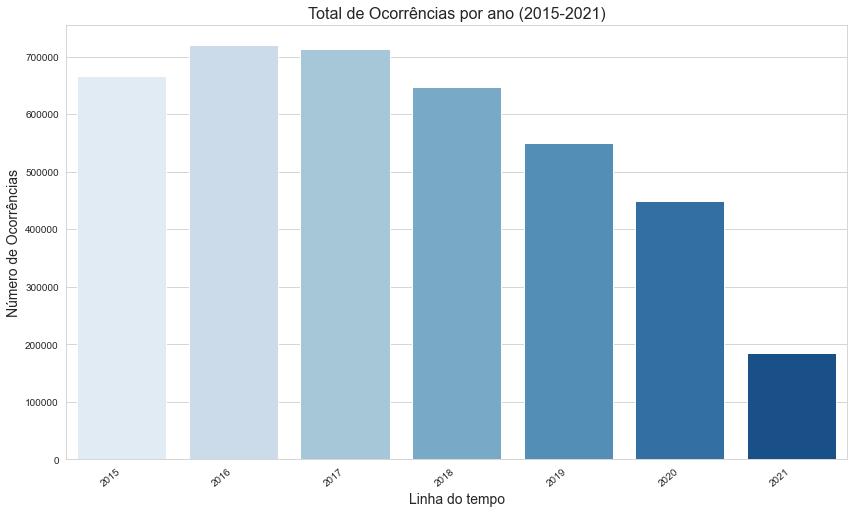

In [104]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=crime_Ano,x='Ano',y='Ocorrências',palette='Blues')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Total de Ocorrências por ano (2015-2021)',fontsize=16)
ax.set_ylabel('Número de Ocorrências',fontsize=14)
ax.set_xlabel('Linha do tempo',fontsize=14)

Apartir do Mapa de calor correlativo, existe claramente correlação entre o total de crimes cometidos e a receita anual do estado, além de como o já esperado veículos(devido a análise anteriores) e a população.

<AxesSubplot:title={'center':'Mapa de calor correlativo'}>

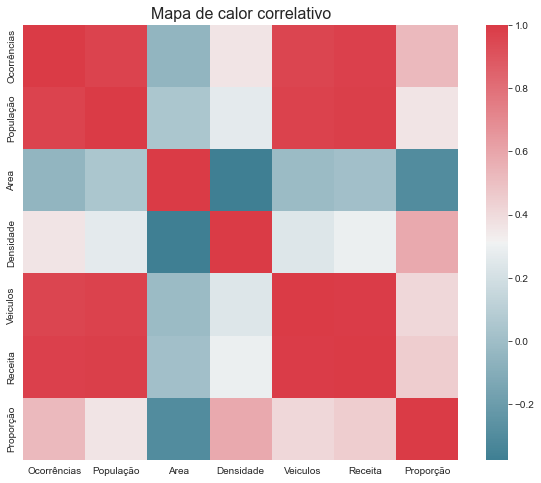

In [106]:
f,ax = plt.subplots(figsize=(10, 8))
ax.set_title('Mapa de calor correlativo',fontsize=16)
corr = crime_UF.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

Decidi levantar o gráfico da receita anual por estado, olhando especificamente para o **Distrito Federal** é possível observar que sua colocação é condizente com as analises anteriores, a criminalidade esta de acordo com sua receita. O que acontece para ele se tornar um outlier em quesitos da taxa de criminalidade por população, é que seus habitantes tem uma maior rendar per capita.

Text(0.5, 0, 'Estados do Brasil')

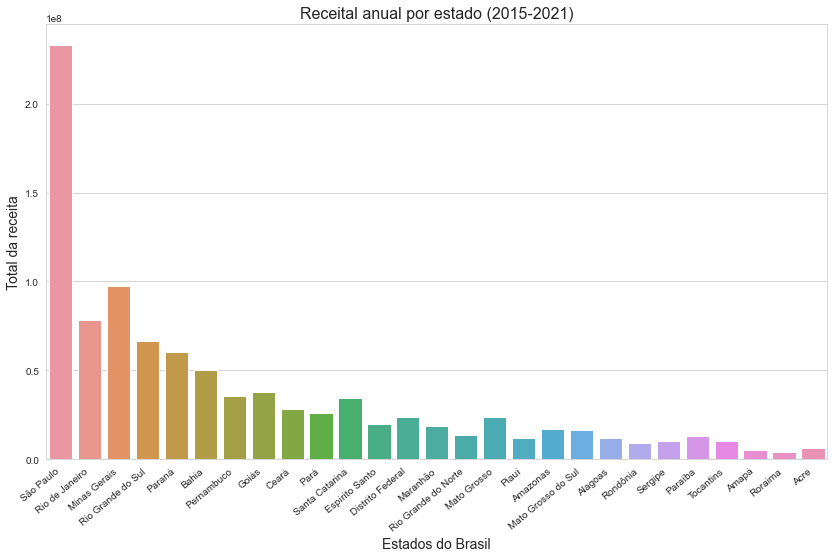

In [110]:
plt.figure(figsize=(14,8)) # this creates a figure 14 inch wide, 8 inch high
ax = sns.barplot(data=crime_UF,x='UF',y='Receita')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",fontsize=10,)
ax.set_title('Receital anual por estado (2015-2021)',fontsize=16)
ax.set_ylabel('Total da receita',fontsize=14)
ax.set_xlabel('Estados do Brasil',fontsize=14)

<h1> Nota final </h1>
Como conclusão  devo dizer que a relação observada entre alta renda e maior número de furtos em veículos poderia ser explicada pela teoria de que crimes contra o patrimônio tendem a ocorrer onde o retorno esperado pelo criminoso é maior. O que de fato é algo preocupante, afinal todos querem crescer, saber que a medida que aumentamos a nossa renda, mais crimes tendem a acontecer. A segurança nacional é um fator preocupante no dia-a-dia dos brasileiros, e que deve ser um dos focos no futuro, mais do que esta sendo no momento.